<a href="https://colab.research.google.com/github/danuponc/rsu_work2/blob/master/Predict_420_2Aux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#predict all model
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from pathlib import Path
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
def load_model(jsonfile,weightfiles):
    # load json and create model
    json_file = open(jsonfile, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(weightfiles)
    print("Loaded model from disk")
    return loaded_model

def plot_confusion_matrix(cm, classes_name,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    real = cm.copy()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes_name))
    if classes_name is not None:
        plt.xticks(tick_marks, classes_name, rotation=45)
        plt.yticks(tick_marks, classes_name)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(real.shape[0]), range(real.shape[1])):
        plt.text(j, i, format(real[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
train_dir = Path('/content/drive/My Drive/bank2/train/')
test_dir = Path('/content/drive/My Drive/bank2/validation/')
#label info
height=420
width=420
channels=3
batch_size=32
seed=1337


# Training generator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(height,width),
                                                    batch_size=1190,
                                                    seed=seed,
                                                    class_mode='categorical')

# Test generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(height,width), 
                                                  batch_size=170,
                                                  seed=seed,
                                                  class_mode='categorical')

x_train,y_train = train_generator.next()
x_test,y_test = test_generator.next()
xdata = np.concatenate((x_train, x_test), axis=0)
ydata = np.concatenate((y_train, y_test), axis=0)

#x_train,x_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2 ,shuffle=True)

Found 1190 images belonging to 17 classes.
Found 170 images belonging to 17 classes.


In [8]:
pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 56.4MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 450kB 61.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=42c8ef7152ce822f125ed352219cfbc872d2cb33791276c721f21f09e0a4655c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

Loaded model from disk
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 210, 210, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 210, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 105, 105, 64) 0           batch_normalization[0][0]        
________________________________________________________________

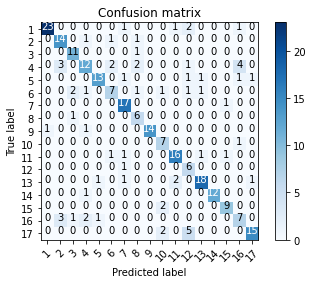

In [4]:
#11 - 2AUX RandomState = 10
x_train,x_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2 , random_state=10,shuffle=True)
jsonfile = '/content/drive/My Drive/bank2/Flower17 2Aux R10.json'
weightfiles = '/content/drive/My Drive/bank2/Flower17 2Aux R10.h5'
loaded_model = load_model(jsonfile,weightfiles)
loaded_model.summary()
x_train.shape,x_test.shape,y_train.shape,y_test.shape
[y_pred11, y_pred21, y_pred31] = loaded_model.predict(x_test)
y_pred11 = np.argmax((y_pred11),axis=1)
y_pred21 = np.argmax((y_pred21),axis=1)
y_pred31 = np.argmax((y_pred31),axis=1)
Ytest = np.argmax((y_test),axis=1)


acc = accuracy_score(Ytest, y_pred31)
prf = precision_recall_fscore_support(Ytest, y_pred31,average='macro', labels=np.unique(y_pred31))

print('#11 - 2AUX RandomState = 10')
print('X Precision = ', precision_score(Ytest, y_pred31, average="macro", labels=np.unique(y_pred31)))
print('X Recall = ', recall_score(Ytest, y_pred31, average="macro"))  
print('X F1 = ', f1_score(Ytest, y_pred31, average="macro",labels=np.unique(y_pred31)))
print('X Accuracy = ', accuracy_score(Ytest, y_pred31))

cm = confusion_matrix(y_pred31, Ytest)
classname = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]
plot_confusion_matrix(cm,classname)

Loaded model from disk
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 210, 210, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 210, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 105, 105, 64) 0           batch_normalization[0][0]        
________________________________________________________________

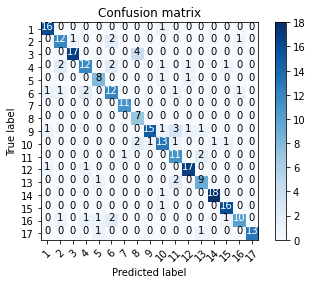

In [6]:
#12 - 2AUX RandomState = 20
x_train,x_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2 , random_state=20,shuffle=True)
jsonfile = '/content/drive/My Drive/bank2/Flower17 2Aux R20.json'
weightfiles = '/content/drive/My Drive/bank2/Flower17 2Aux R20.h5'
loaded_model = load_model(jsonfile,weightfiles)
loaded_model.summary()
x_train.shape,x_test.shape,y_train.shape,y_test.shape
[y_pred11, y_pred21, y_pred31] = loaded_model.predict(x_test)
y_pred11 = np.argmax((y_pred11),axis=1)
y_pred31 = np.argmax((y_pred31),axis=1)
Ytest = np.argmax((y_test),axis=1)

acc = accuracy_score(Ytest, y_pred31)
prf = precision_recall_fscore_support(Ytest, y_pred31,average='macro', labels=np.unique(y_pred31))

print('#12 - 2AUX RandomState = 20')
print('X Precision = ', precision_score(Ytest, y_pred31, average="macro", labels=np.unique(y_pred31)))
print('X Recall = ', recall_score(Ytest, y_pred31, average="macro"))  
print('X F1 = ', f1_score(Ytest, y_pred31, average="macro",labels=np.unique(y_pred31)))
print('X Accuracy = ', accuracy_score(Ytest, y_pred31))

cm = confusion_matrix(y_pred31, Ytest)
classname = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]
plot_confusion_matrix(cm,classname)

Loaded model from disk
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 210, 210, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 210, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 105, 105, 64) 0           batch_normalization[0][0]        
________________________________________________________________

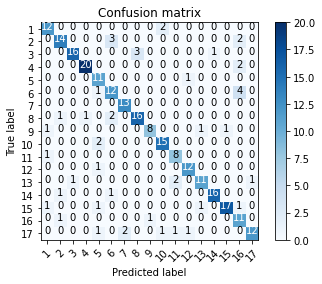

In [7]:
#13 - 2AUX RandomState = 30
x_train,x_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2 , random_state=30,shuffle=True)
jsonfile = '/content/drive/My Drive/bank2/Flower17 2Aux R30.json'
weightfiles = '/content/drive/My Drive/bank2/Flower17 2Aux R30.h5'
loaded_model = load_model(jsonfile,weightfiles)
loaded_model.summary()
x_train.shape,x_test.shape,y_train.shape,y_test.shape
[y_pred11, y_pred21, y_pred31] = loaded_model.predict(x_test)
y_pred11 = np.argmax((y_pred11),axis=1)
y_pred31 = np.argmax((y_pred31),axis=1)
Ytest = np.argmax((y_test),axis=1)

acc = accuracy_score(Ytest, y_pred31)
prf = precision_recall_fscore_support(Ytest, y_pred31,average='macro', labels=np.unique(y_pred31))

print('#13 - 2AUX RandomState = 30')
print('X Precision = ', precision_score(Ytest, y_pred31, average="macro", labels=np.unique(y_pred31)))
print('X Recall = ', recall_score(Ytest, y_pred31, average="macro"))  
print('X F1 = ', f1_score(Ytest, y_pred31, average="macro",labels=np.unique(y_pred31)))
print('X Accuracy = ', accuracy_score(Ytest, y_pred31))

cm = confusion_matrix(y_pred31, Ytest)
classname = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]
plot_confusion_matrix(cm,classname)

Loaded model from disk
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 210, 210, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 210, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 105, 105, 64) 0           batch_normalization[0][0]        
________________________________________________________________

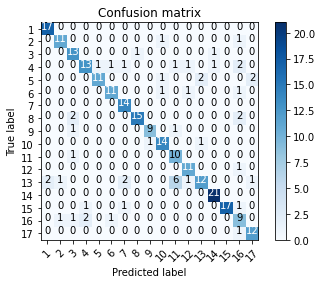

In [8]:
#14 - 2AUX RandomState = 40
x_train,x_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2 , random_state=40,shuffle=True)
jsonfile = '/content/drive/My Drive/bank2/Flower17 2Aux R40.json'
weightfiles = '/content/drive/My Drive/bank2/Flower17 2Aux R40.h5'
loaded_model = load_model(jsonfile,weightfiles)
loaded_model.summary()
x_train.shape,x_test.shape,y_train.shape,y_test.shape
[y_pred11, y_pred21, y_pred31] = loaded_model.predict(x_test)
y_pred11 = np.argmax((y_pred11),axis=1)
y_pred31 = np.argmax((y_pred31),axis=1)
Ytest = np.argmax((y_test),axis=1)

acc = accuracy_score(Ytest, y_pred31)
prf = precision_recall_fscore_support(Ytest, y_pred31,average='macro', labels=np.unique(y_pred31))

print('#14 - 2AUX RandomState = 40')
print('X Precision = ', precision_score(Ytest, y_pred31, average="macro", labels=np.unique(y_pred31)))
print('X Recall = ', recall_score(Ytest, y_pred31, average="macro"))  
print('X F1 = ', f1_score(Ytest, y_pred31, average="macro",labels=np.unique(y_pred31)))
print('X Accuracy = ', accuracy_score(Ytest, y_pred31))

cm = confusion_matrix(y_pred31, Ytest)
classname = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]
plot_confusion_matrix(cm,classname)

Loaded model from disk
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 420, 420, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 210, 210, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 210, 210, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 105, 105, 64) 0           batch_normalization[0][0]        
________________________________________________________________

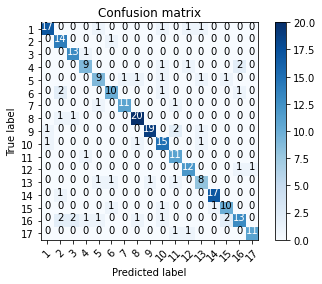

In [9]:
#15 - 2AUX RandomState = 50
x_train,x_test,y_train,y_test = train_test_split(xdata, ydata, test_size=0.2 , random_state=50,shuffle=True)
jsonfile = '/content/drive/My Drive/bank2/Flower17 2 Aux R50.json'
weightfiles = '/content/drive/My Drive/bank2/Flower17 2 Aux R50.h5'
loaded_model = load_model(jsonfile,weightfiles)
loaded_model.summary()
x_train.shape,x_test.shape,y_train.shape,y_test.shape
[y_pred11, y_pred21, y_pred31] = loaded_model.predict(x_test)
y_pred11 = np.argmax((y_pred11),axis=1)
y_pred31 = np.argmax((y_pred31),axis=1)
Ytest = np.argmax((y_test),axis=1)

acc = accuracy_score(Ytest, y_pred31)
prf = precision_recall_fscore_support(Ytest, y_pred31,average='macro', labels=np.unique(y_pred31))

print('#15 - 2AUX RandomState = 50')
print('X Precision = ', precision_score(Ytest, y_pred31, average="macro", labels=np.unique(y_pred31)))
print('X Recall = ', recall_score(Ytest, y_pred31, average="macro"))  
print('X F1 = ', f1_score(Ytest, y_pred31, average="macro",labels=np.unique(y_pred31)))
print('X Accuracy = ', accuracy_score(Ytest, y_pred31))

cm = confusion_matrix(y_pred31, Ytest)
classname = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"]
plot_confusion_matrix(cm,classname)